<a href="https://colab.research.google.com/github/jattiarman/Python-Project-for-Data-Science/blob/main/Analyzing_Historical_Stock_Revenue_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use yfinance to Extract Tesla Stock Data

In [ ]:
import yfinance as yf
import pandas as pd

# 1. Create the ticker object
tesla = yf.Ticker("TSLA")

# 2. Extract stock information
tesla_data = tesla.history(period="max")

# 3. Reset the index
tesla_data.reset_index(inplace=True)

# 4. Display the first five rows (Crucial for Question 1.2)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Use Webscraping to Extract Tesla Revenue Data

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")

# Extract the table into a dataframe
tesla_revenue = pd.read_html(str(soup))[0]
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column (Crucial for Question 4)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last five rows (Crucial for Question 1.3)
tesla_revenue.tail()

<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1671889881.py:13: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
/tmp/ipython-input-1671889881.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(soup))[0]


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


Use yfinance to Extract GameStop Stock Data

In [ ]:
# 1. Create the ticker object for GME
gme = yf.Ticker("GME")

# 2. Extract max history
gme_data = gme.history(period="max")

# 3. Reset index
gme_data.reset_index(inplace=True)

# 4. Display the first five rows (Crucial for Question 1.4)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Use Webscraping to Extract GME Revenue Data

In [ ]:
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, "html5lib")

# Extract table
gme_revenue = pd.read_html(str(soup_gme))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Clean data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display last five rows (Crucial for Question 1.5)
gme_revenue.tail()

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3904812226.py:10: SyntaxWarning: invalid escape sequence '\$'
  gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
/tmp/ipython-input-3904812226.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(soup_gme))[0]


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


Plot Tesla Stock Graph

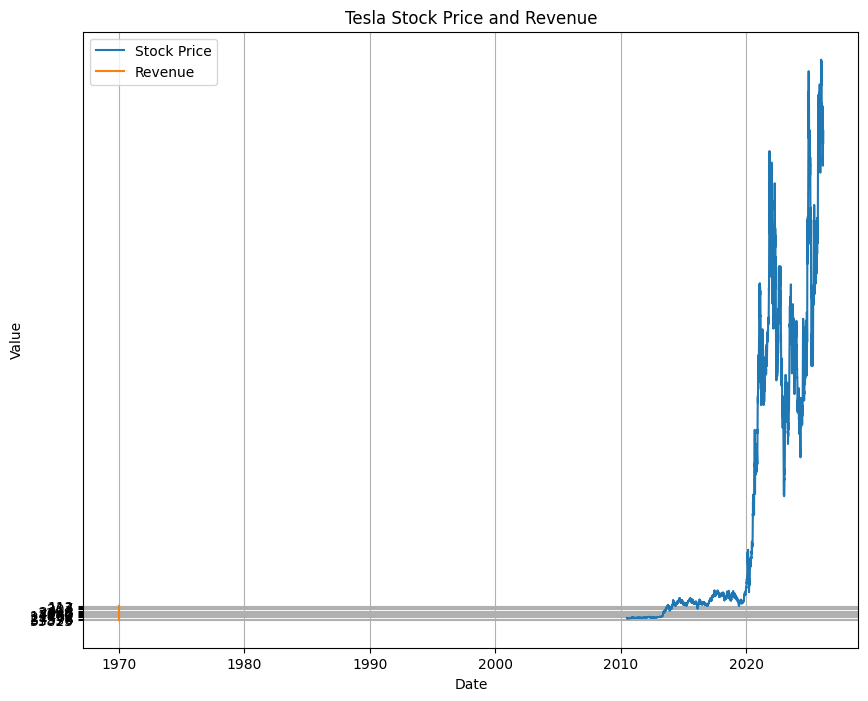

In [ ]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    fig = plt.figure(figsize=(10, 8))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    plt.plot(revenue_data.index, revenue_data['Revenue'], label='Revenue')
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Convert 'Date' column to datetime objects and set as index for plotting
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.set_index('Date', inplace=True)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.set_index('Date', inplace=True)

# Call the make_graph function for Tesla (Crucial for Question 1.6)
make_graph(tesla_data, tesla_revenue, 'Tesla')

Plot GameStop Stock Graph

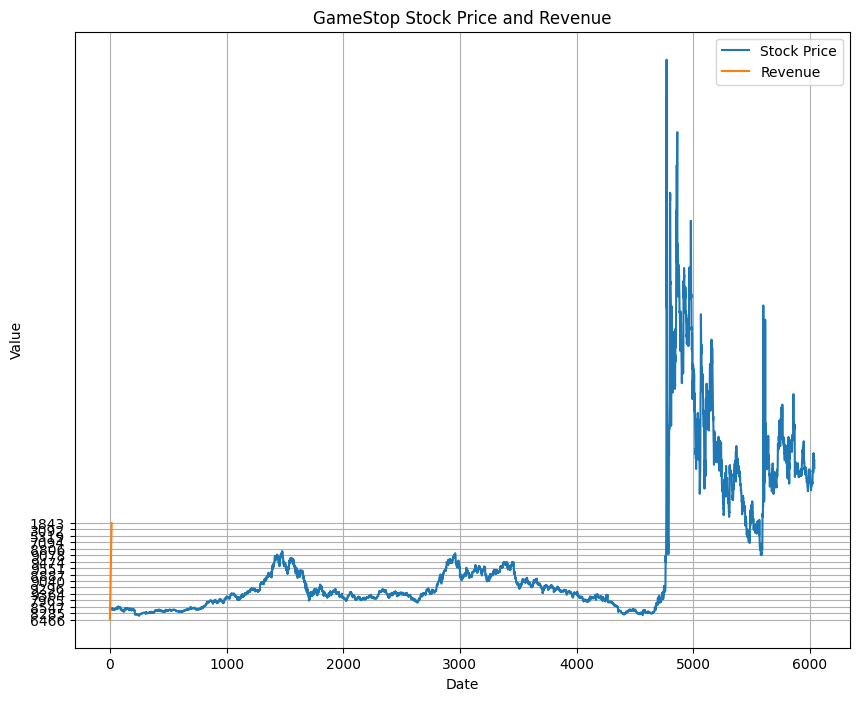

In [ ]:
# Call the make_graph function for GME (Crucial for Question 1.7)
make_graph(gme_data, gme_revenue, 'GameStop')